In [49]:
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# 1. Load Test, Train set

In [50]:
X = pd.read_csv("Pre Processing data/1.4. trainData.csv")
Y = X.pop('ID')

In [51]:
X_test = pd.read_csv("Pre Processing data/1.4. testData.csv")
Y_test = X_test.pop('ID')

In [52]:
X_test.head(10)

,Gender=1,age_group=1,age_group=2,age_group=3,age_group=4,Occupation=2,Distances=1,Distances=2,Distances=3,Cooking_fumes=2,Air_Pollution_Exposure=1,SmokeLevel=0,SmokeLevel=1,SmokeLevel=2,CigSmoke_status=1,CigSmoke_status=2,CigSmoke_status=3,Herbicides=1,Insecticides=1
0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0
1,1,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0
2,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1
4,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,1,1
5,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0
6,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1
7,1,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,1
8,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,0,0,1,1
9,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1


In [53]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,test_size=0.2)

# 2. Train Model
## 2.1 KNN Model

In [54]:
kNN = KNeighborsClassifier(n_neighbors=10)
kNN.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=10)

In [55]:
score = kNN.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6422018348623854


In [56]:
y_pred = kNN.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.76      0.96      0.85        89
        True       0.83      0.41      0.55        46

    accuracy                           0.77       135
   macro avg       0.79      0.68      0.70       135
weighted avg       0.78      0.77      0.75       135



In [57]:
categories = ['True', 'False']

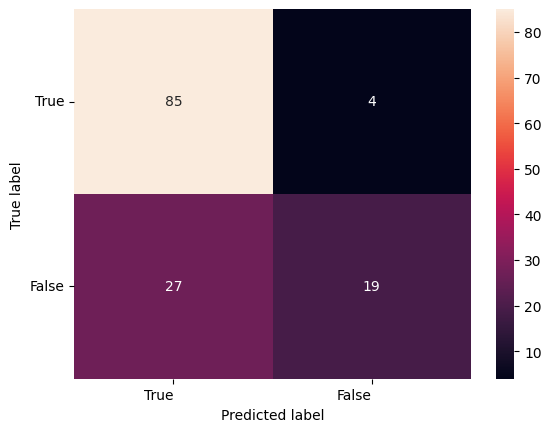

In [58]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.2 Decision Tree

In [59]:
decisionTreeModel = DecisionTreeClassifier(random_state=42)

decisionTreeModel.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [60]:
score = decisionTreeModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.7981651376146789


In [61]:
y_pred = decisionTreeModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.92      0.76      0.83        89
        True       0.66      0.87      0.75        46

    accuracy                           0.80       135
   macro avg       0.79      0.82      0.79       135
weighted avg       0.83      0.80      0.80       135



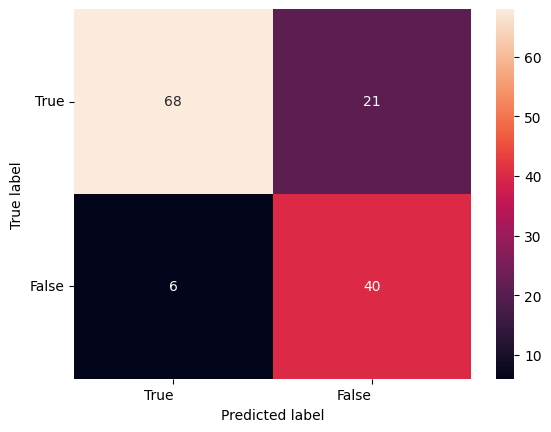

In [62]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.3 Random Forest Model

In [63]:
randomForestModel = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)

randomForestModel.fit(X_train, Y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [64]:
score = randomForestModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6605504587155964


In [65]:
y_pred = randomForestModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.66      1.00      0.79        89
        True       0.00      0.00      0.00        46

    accuracy                           0.66       135
   macro avg       0.33      0.50      0.40       135
weighted avg       0.43      0.66      0.52       135



c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

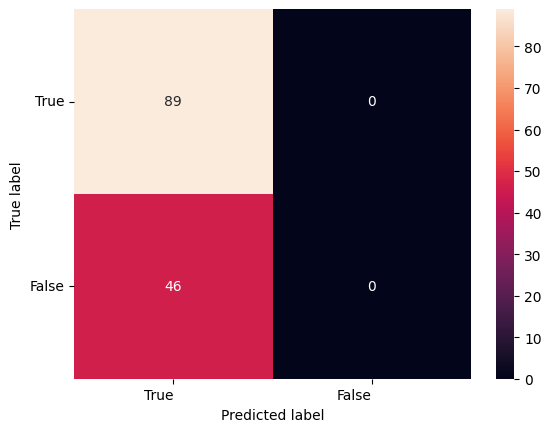

In [66]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

## 2.5 Support Vector Machine (SVM)

In [67]:
from sklearn import svm

svmModel = svm.SVC(kernel='linear', gamma='auto', C=2)
svmModel.fit(X_train, Y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [68]:
score = svmModel.score(X_val, Y_val)
print("Validation score: ", score)

Validation score:  0.6605504587155964


In [69]:
y_pred = svmModel.predict(X_test)
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

       False       0.66      1.00      0.79        89
        True       0.00      0.00      0.00        46

    accuracy                           0.66       135
   macro avg       0.33      0.50      0.40       135
weighted avg       0.43      0.66      0.52       135



c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\wwwng\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

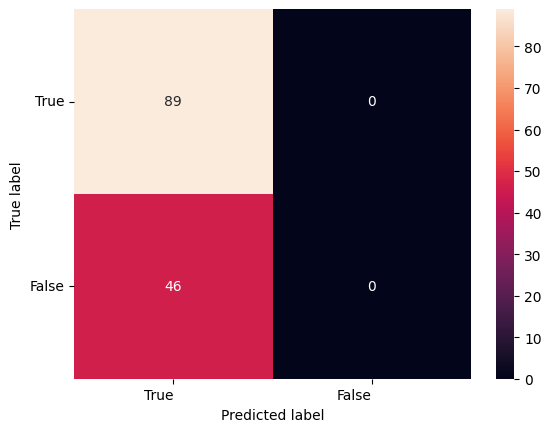

In [70]:
cm = confusion_matrix(Y_test, y_pred)
ax = sns.heatmap(cm, annot=True, fmt='g', xticklabels=categories, yticklabels=categories)

ax.set_xticklabels(categories, rotation=0, ha='right')
ax.set_yticklabels(categories, rotation=0, ha='right')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [71]:
# Save Model
import joblib

path = "Models/"

joblib.dump(kNN, path + 'KNN_model.pkl')
joblib.dump(randomForestModel, path + 'randomForest_model.pkl')
joblib.dump(decisionTreeModel, path + 'decisionTree_model.pkl')
joblib.dump(svmModel, path + 'svm_model.pkl')

['Models/svm_model.pkl']